# BC3409 AI in Accounting & Finance Group 3 Code 
In this notebook, we hightlight the  approaches we took to train and test the various CNN models. We start with a self-train model using Keras Tensorflow, followed by an improvement to this model. We will also evaluate this effectiveness of the model against other popular CNN models such as VGG, ResNet and AlexNet. Ultimately, we will compare the results obtained from each model to determine the most optimal model to predict melanoma 

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import imagesize
from pathlib import Path
from matplotlib.image import imread
import os
import random
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Activation, Dropout,  Flatten, Dense,MaxPool2D,BatchNormalization
import cv2
import numpy as np
import os
from keras.applications.resnet import ResNet50
from keras.models import save_model
from tensorflow.keras.applications import resnet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, plot_precision_recall_curve, plot_roc_curve, plot_confusion_matrix, confusion_matrix

In [2]:
data_path = r'C:\Users\yixua\OneDrive - Nanyang Technological University\AY2022-2023 SEM 1\BC3409 AI in Accounting and Finance\Project\melanoma_cancer_dataset'
train_path = r'C:\Users\yixua\OneDrive - Nanyang Technological University\AY2022-2023 SEM 1\BC3409 AI in Accounting and Finance\Project\melanoma_cancer_dataset\train'
test_path = r'C:\Users\yixua\OneDrive - Nanyang Technological University\AY2022-2023 SEM 1\BC3409 AI in Accounting and Finance\Project\melanoma_cancer_dataset\test'
os.listdir(train_path)

['benign', 'malignant']

# Data Exploration & Analysis

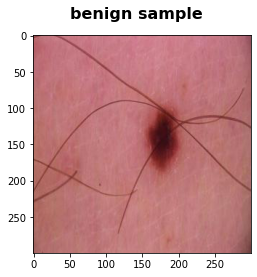

In [3]:
benign_sample = imread(train_path+"/benign"+"/melanoma_2898.jpg")
plt.imshow(benign_sample)
plt.suptitle('benign sample', fontsize=16, weight='bold');

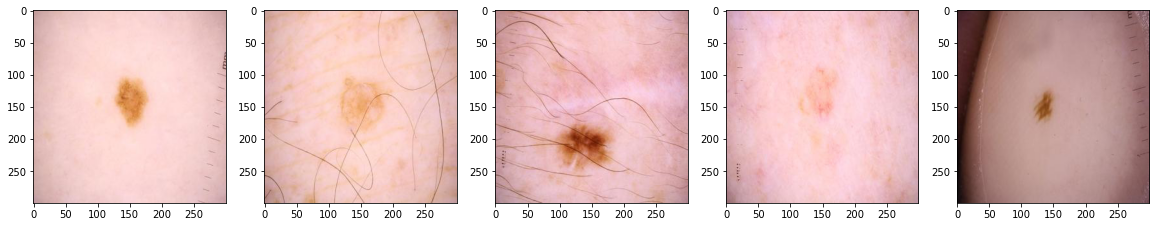

In [31]:
# list to store images
images_path = []

# Iterate directory
for file in os.listdir(train_path + "/benign")[:5]:
    if file.endswith('.jpg'):
        images_path.append(file)
        
images_path

f, axarr = plt.subplots(1,5)
f.set_size_inches(20,20)

for (index, file) in enumerate(images_path):
    img = imread(train_path+"/benign/"+file)
    axarr[index].imshow(img)
plt.show()

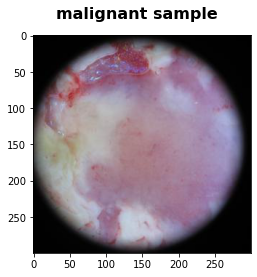

In [4]:
malignant_sample = imread(train_path+"/malignant"+"/melanoma_5708.jpg")
plt.imshow(malignant_sample)
plt.suptitle('malignant sample', fontsize=16, weight='bold');

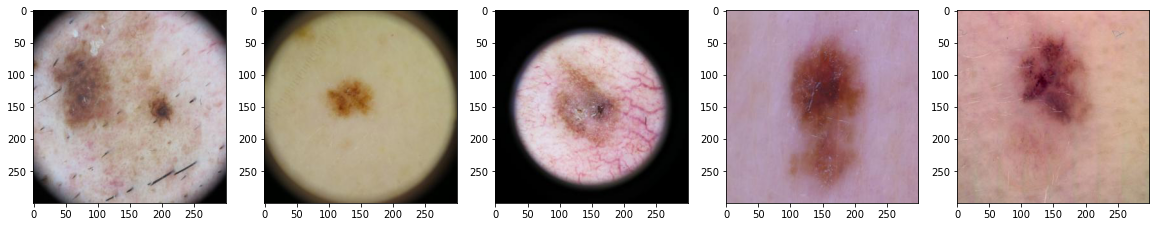

In [32]:
# list to store images
images_path = []

# Iterate directory
for file in os.listdir(train_path + "/malignant")[:5]:
    if file.endswith('.jpg'):
        images_path.append(file)
        
images_path

f, axarr = plt.subplots(1,5)
f.set_size_inches(20,20)

for (index, file) in enumerate(images_path):
    img = imread(train_path+"/malignant/"+file)
    axarr[index].imshow(img)
plt.show()

In [35]:
train_benign_count = len(os.listdir(train_path + '/benign'))
print("Train Benign Count: ", train_benign_count)

train_malignant_count = len(os.listdir(train_path + '/malignant'))
print("Train Malignant Count: ", train_malignant_count)

test_benign_count = len(os.listdir(test_path + '/benign'))
print("Train Benign Count: ", test_benign_count)

test_malignant_count = len(os.listdir(test_path + '/malignant'))
print("Train Malignant Count: ", test_malignant_count)


Train Benign Count:  5000
Train Malignant Count:  4605
Train Benign Count:  500
Train Malignant Count:  500


<AxesSubplot:xlabel='set', ylabel='count'>

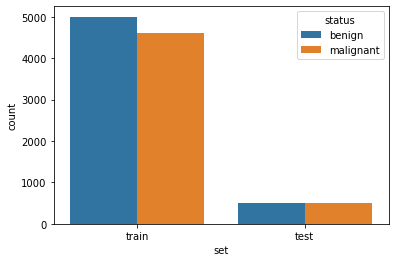

In [36]:
data = {"count": [train_benign_count,train_malignant_count,test_benign_count,test_malignant_count],"set": ["train","train","test","test"],"status": ["benign","malignant","benign","malignant"]}
df = pd.DataFrame(data)
sns.barplot(x = "set",y = "count",hue = "status",data = df)

## Initial CNN Model using TensorFlow

In [55]:
g = ImageDataGenerator()

In [56]:
train_data = g.flow_from_directory(train_path,(150,150), batch_size = 5, shuffle = False)

Found 9605 images belonging to 2 classes.


In [57]:
test_data = g.flow_from_directory(test_path,(150,150), batch_size = 5, shuffle = False)

Found 1000 images belonging to 2 classes.


In [58]:
model = Sequential()
model.add(Conv2D(32,(3,3), input_shape=(150,150,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2),strides = 2))
model.add(Dropout(0.1))

model.add(Conv2D(32,(3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2),strides = 2))
model.add(Dropout(0.1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 74, 74, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 36, 36, 32)       

In [59]:
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2),strides = 2))
model.add(Dropout(0.1))

model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2),strides = 2))
model.add(Dropout(0.1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 74, 74, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 36, 36, 32)       

In [60]:
model.add(Flatten())

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 74, 74, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 36, 36, 32)       

In [61]:
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(2,activation='softmax'))

In [62]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [63]:
h = model.fit(train_data, batch_size = 5, epochs = 10)

Epoch 1/10
1921/1921 [==============================] - 70s 36ms/step - loss: 1.1011 - accuracy: 0.6319
Epoch 2/10
1921/1921 [==============================] - 68s 35ms/step - loss: 0.7664 - accuracy: 0.5983
Epoch 3/10
1921/1921 [==============================] - 69s 36ms/step - loss: 0.6459 - accuracy: 0.6027
Epoch 4/10
1921/1921 [==============================] - 71s 37ms/step - loss: 0.6679 - accuracy: 0.5975
Epoch 5/10
1921/1921 [==============================] - 72s 38ms/step - loss: 1.1697 - accuracy: 0.6129
Epoch 6/10
1921/1921 [==============================] - 70s 37ms/step - loss: 0.6364 - accuracy: 0.6638
Epoch 7/10
1921/1921 [==============================] - 68s 36ms/step - loss: 0.5751 - accuracy: 0.6791
Epoch 8/10
1921/1921 [==============================] - 69s 36ms/step - loss: 0.6500 - accuracy: 0.6504
Epoch 9/10
1921/1921 [==============================] - 68s 35ms/step - loss: 0.5792 - accuracy: 0.6668
Epoch 10/10
1921/1921 [==============================] - 72s 37m

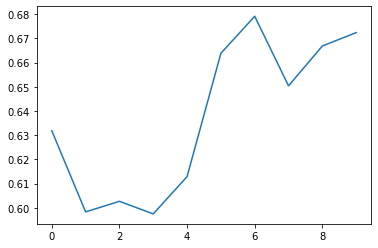

In [64]:
plt.plot(h.history['accuracy'])

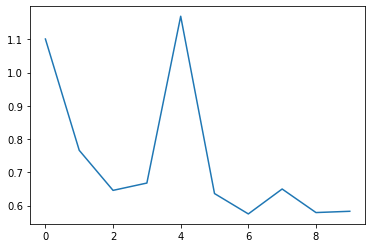

In [65]:
plt.plot(h.history['loss'])

In [66]:
pred = model.predict(test_data)

200/200 [==============================] - 2s 9ms/step


In [67]:
test_data.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [68]:
pred = np.argmax(pred, axis = 1) 
cm = confusion_matrix(test_data.classes, pred)
cm

array([[499,   1],
       [305, 195]], dtype=int64)

In [69]:
tn, fp, fn, tp = cm.ravel()
(tn, fp, fn, tp)

(499, 1, 305, 195)

<AxesSubplot:>

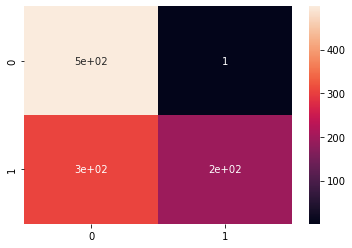

In [71]:
sns.heatmap(cm, annot=True)

In [72]:
acc = (tp+tn)/(tp+tn+fn+fp)
print("Accuracy is: ", acc)

fnr = fn/(tp+fn)
print("False Negative Rate is: ", fnr)

precision = tp/(tp+fp)
print("Precision is : ", precision)

recall = tp/(tp+fn)
print("Recall is : ", recall)

Accuracy is:  0.694
False Negative Rate is:  0.61
Precision is :  0.9948979591836735
Recall is :  0.39


# Improvement to TensorFlow CNN Model

## Improved Model using Multiple FC Layers

In [55]:
train_datagen = ImageDataGenerator(
        rescale=1. / 255,
        zoom_range = [0.2, 0.4],
        brightness_range = [0.8, 1.2],
        rotation_range=15,
        horizontal_flip=True)

In [56]:
test_datagen = ImageDataGenerator(
    rescale=1./255)

In [57]:
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(300, 300),
        batch_size= 16,
        class_mode='binary',
        shuffle=True)

Found 9605 images belonging to 2 classes.


In [58]:
test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(300, 300),
        batch_size=16,
        class_mode='binary',
        shuffle=False)

Found 1000 images belonging to 2 classes.


In [45]:
train_data, train_labels = train_generator.next()

In [46]:
print(train_data.shape, train_labels.shape)

(16, 300, 300, 3) (16,)


In [47]:
train_data, test_data, train_labels, test_labels = train_test_split(train_data, train_labels, test_size = 0.2, random_state=1)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size = 0.2, random_state=1)

In [59]:
random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

In [60]:
nb_filter = 32
image_size = (300,300,3)

model = Sequential()
model.add(Conv2D(nb_filter,(3,3), input_shape=image_size, activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2),strides = 2))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(nb_filter*2, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides = 2))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(nb_filter*4, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = 2))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 149, 149, 32)     0         
 2D)                                                             
                                                                 
 batch_normalization_18 (Bat  (None, 149, 149, 32)     128       
 chNormalization)                                                
                                                                 
 dropout_18 (Dropout)        (None, 149, 149, 32)      0         
                                                                 
 conv2d_10 (Conv2D)          (None, 147, 147, 64)      18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 73, 73, 64)      

In [61]:
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.7))

model.add(Dense(128))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 149, 149, 32)     0         
 2D)                                                             
                                                                 
 batch_normalization_18 (Bat  (None, 149, 149, 32)     128       
 chNormalization)                                                
                                                                 
 dropout_18 (Dropout)        (None, 149, 149, 32)      0         
                                                                 
 conv2d_10 (Conv2D)          (None, 147, 147, 64)      18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 73, 73, 64)      

In [62]:
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [66]:
train_data_size = 9605
validation_data_size = 1000
batch_size = 16

h = model.fit_generator(
        train_generator,
        steps_per_epoch = train_data_size // batch_size,
        epochs= 100,
        validation_data = test_generator,
        validation_steps= validation_data_size // batch_size,
    )

C:\Users\yixua\AppData\Local\Temp\ipykernel_264\599219558.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  h = model.fit_generator(


Epoch 1/100
600/600 [==============================] - 423s 704ms/step - loss: 0.4959 - accuracy: 0.7618 - val_loss: 0.4333 - val_accuracy: 0.7984
Epoch 2/100
600/600 [==============================] - 420s 699ms/step - loss: 0.4722 - accuracy: 0.7838 - val_loss: 0.4476 - val_accuracy: 0.8024
Epoch 3/100
600/600 [==============================] - 425s 707ms/step - loss: 0.4674 - accuracy: 0.7825 - val_loss: 0.3773 - val_accuracy: 0.8296
Epoch 4/100
600/600 [==============================] - 420s 699ms/step - loss: 0.4673 - accuracy: 0.7821 - val_loss: 0.4904 - val_accuracy: 0.8004
Epoch 5/100
600/600 [==============================] - 418s 697ms/step - loss: 0.4549 - accuracy: 0.7906 - val_loss: 0.4408 - val_accuracy: 0.8024
Epoch 6/100
600/600 [==============================] - 420s 700ms/step - loss: 0.4498 - accuracy: 0.7952 - val_loss: 0.4791 - val_accuracy: 0.7530
Epoch 7/100
600/600 [==============================] - 420s 699ms/step - loss: 0.4497 - accuracy: 0.7971 - val_loss: 0

In [67]:
save_model(model, "TensorFlow Changes")

INFO:tensorflow:Assets written to: TensorFlow Changes\assets


INFO:tensorflow:Assets written to: TensorFlow Changes\assets


<AxesSubplot:>

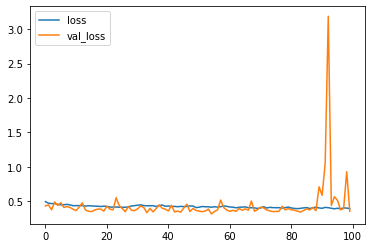

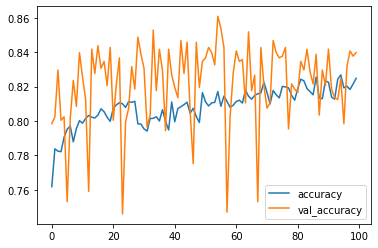

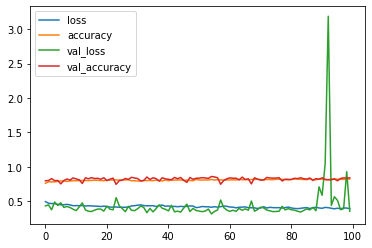

In [68]:
losses = pd.DataFrame(h.history)
losses.head()
losses[['loss','val_loss']].plot() 
losses[['accuracy','val_accuracy']].plot() 
losses.plot()

In [69]:
score = model.evaluate(test_generator)
print(score)

63/63 [==============================] - 10s 161ms/step - loss: 0.3611 - accuracy: 0.8360
[0.3610875904560089, 0.8360000252723694]


In [71]:
pred = model.predict(test_generator)

63/63 [==============================] - 7s 114ms/step


In [72]:
pred = np.round(pred).tolist()
pred

[[1.0],
 [0.0],
 [0.0],
 [1.0],
 [0.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [1.0],
 [0.0],
 [0.0],
 [0.0],
 [1.0],
 [0.0],
 [0.0],
 [0.0],
 [1.0],
 [0.0],
 [0.0],
 [0.0],
 [1.0],
 [0.0],
 [1.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [1.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [1.0],
 [0.0],
 [0.0],
 [1.0],
 [0.0],
 [0.0],
 [0.0],
 [1.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [1.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [1.0],
 [0.0],
 [0.0],
 [1.0],
 [0.0],
 [0.0],
 [1.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [0.0],
 [0.0],
 [0.0],
 [1.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [1.0],
 [0.0],
 [1.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],


In [73]:
cm = confusion_matrix(test_generator.classes, pred)
cm

array([[412,  88],
       [ 76, 424]], dtype=int64)

In [74]:
tn, fp, fn, tp = cm.ravel()
(tn, fp, fn, tp)

(412, 88, 76, 424)

<AxesSubplot:>

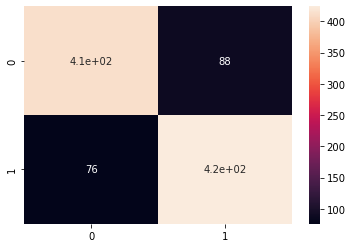

In [75]:
sns.heatmap(cm, annot=True)

In [76]:
acc = (tp+tn)/(tp+tn+fn+fp)
print("Accuracy is: ", acc)

fnr = fn/(tp+fn)
print("False Negative Rate is: ", fnr)

precision = tp/(tp+fp)
print("Precision is : ", precision)

recall = tp/(tp+fn)
print("Recall is : ", recall)

Accuracy is:  0.836
False Negative Rate is:  0.152
Precision is :  0.828125
Recall is :  0.848


## Improved Model using 1 hidden layer 

### Data Augmentation

In [3]:
train_datagen = ImageDataGenerator(
        rescale=1. / 255,
        zoom_range=0.2,
        rotation_range=15,
        horizontal_flip=True)

In [4]:
test_datagen = ImageDataGenerator(
    rescale=1./255)

### Determining optimal image size

In [5]:
# Get the Image Resolutions
imgs = [img.name for img in Path(train_path + "\\benign\\").iterdir() if img.suffix == ".jpg"]
img_meta = {}
for f in imgs: img_meta[str(f)] = imagesize.get(train_path + "\\benign\\"+f)

# Convert it to Dataframe and compute aspect ratio
img_meta_df = pd.DataFrame.from_dict([img_meta]).T.reset_index().set_axis(['FileName', 'Size'], axis='columns', inplace=False)
img_meta_df[["Width", "Height"]] = pd.DataFrame(img_meta_df["Size"].tolist(), index=img_meta_df.index)
img_meta_df["Aspect Ratio"] = round(img_meta_df["Width"] / img_meta_df["Height"], 2)

print("Train Benign Dataset")
print(f'Total Nr of Images in the dataset: {len(img_meta_df)}')
img_meta_df.head()

Train Benign Dataset
Total Nr of Images in the dataset: 5000


,FileName,Size,Width,Height,Aspect Ratio
0,melanoma_0.jpg,"(300, 300)",300,300,1.0
1,melanoma_1.jpg,"(300, 300)",300,300,1.0
2,melanoma_10.jpg,"(300, 300)",300,300,1.0
3,melanoma_100.jpg,"(300, 300)",300,300,1.0
4,melanoma_1000.jpg,"(300, 300)",300,300,1.0


In [6]:
# Get the Image Resolutions
imgs = [img.name for img in Path(train_path + "\\malignant\\").iterdir() if img.suffix == ".jpg"]
img_meta = {}
for f in imgs: img_meta[str(f)] = imagesize.get(train_path + "\\malignant\\"+f)

# Convert it to Dataframe and compute aspect ratio
img_meta_df = pd.DataFrame.from_dict([img_meta]).T.reset_index().set_axis(['FileName', 'Size'], axis='columns', inplace=False)
img_meta_df[["Width", "Height"]] = pd.DataFrame(img_meta_df["Size"].tolist(), index=img_meta_df.index)
img_meta_df["Aspect Ratio"] = round(img_meta_df["Width"] / img_meta_df["Height"], 2)

print("Train Malignant Dataset")
print(f'Total Nr of Images in the dataset: {len(img_meta_df)}')
img_meta_df.head()

Train Malignant Dataset
Total Nr of Images in the dataset: 4605


,FileName,Size,Width,Height,Aspect Ratio
0,melanoma_5000.jpg,"(300, 300)",300,300,1.0
1,melanoma_5001.jpg,"(300, 300)",300,300,1.0
2,melanoma_5002.jpg,"(300, 300)",300,300,1.0
3,melanoma_5003.jpg,"(300, 300)",300,300,1.0
4,melanoma_5004.jpg,"(300, 300)",300,300,1.0


In [7]:
# Get the Image Resolutions
imgs = [img.name for img in Path(test_path + "\\benign\\").iterdir() if img.suffix == ".jpg"]
img_meta = {}
for f in imgs: img_meta[str(f)] = imagesize.get(test_path + "\\benign\\"+f)

# Convert it to Dataframe and compute aspect ratio
img_meta_df = pd.DataFrame.from_dict([img_meta]).T.reset_index().set_axis(['FileName', 'Size'], axis='columns', inplace=False)
img_meta_df[["Width", "Height"]] = pd.DataFrame(img_meta_df["Size"].tolist(), index=img_meta_df.index)
img_meta_df["Aspect Ratio"] = round(img_meta_df["Width"] / img_meta_df["Height"], 2)

print("Test Benign Dataset")
print(f'Total Nr of Images in the dataset: {len(img_meta_df)}')
img_meta_df.head()

Test Benign Dataset
Total Nr of Images in the dataset: 500


,FileName,Size,Width,Height,Aspect Ratio
0,melanoma_10000.jpg,"(300, 300)",300,300,1.0
1,melanoma_10001.jpg,"(300, 300)",300,300,1.0
2,melanoma_10002.jpg,"(300, 300)",300,300,1.0
3,melanoma_10003.jpg,"(300, 300)",300,300,1.0
4,melanoma_10004.jpg,"(300, 300)",300,300,1.0


In [8]:
# Get the Image Resolutions
imgs = [img.name for img in Path(test_path + "\\malignant\\").iterdir() if img.suffix == ".jpg"]
img_meta = {}
for f in imgs: img_meta[str(f)] = imagesize.get(test_path + "\\malignant\\"+f)

# Convert it to Dataframe and compute aspect ratio
img_meta_df = pd.DataFrame.from_dict([img_meta]).T.reset_index().set_axis(['FileName', 'Size'], axis='columns', inplace=False)
img_meta_df[["Width", "Height"]] = pd.DataFrame(img_meta_df["Size"].tolist(), index=img_meta_df.index)
img_meta_df["Aspect Ratio"] = round(img_meta_df["Width"] / img_meta_df["Height"], 2)

print("Test Malignant Dataset")
print(f'Total Nr of Images in the dataset: {len(img_meta_df)}')
img_meta_df.head()

Test Malignant Dataset
Total Nr of Images in the dataset: 500


,FileName,Size,Width,Height,Aspect Ratio
0,melanoma_10105.jpg,"(300, 300)",300,300,1.0
1,melanoma_10106.jpg,"(300, 300)",300,300,1.0
2,melanoma_10107.jpg,"(300, 300)",300,300,1.0
3,melanoma_10108.jpg,"(300, 300)",300,300,1.0
4,melanoma_10109.jpg,"(300, 300)",300,300,1.0


Text(0, 0.5, 'Height')

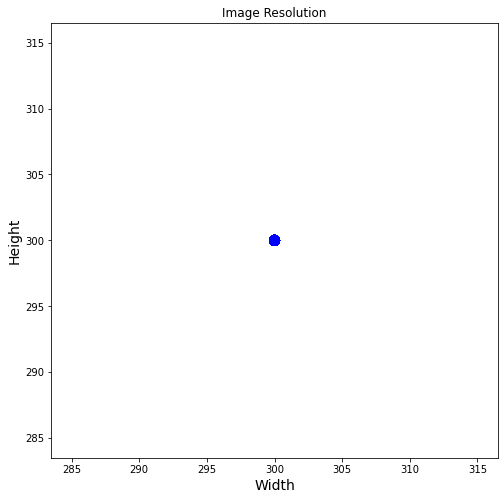

In [9]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
points = ax.scatter(img_meta_df.Width, img_meta_df.Height, color='blue', alpha=0.5, s=img_meta_df["Aspect Ratio"]*100, picker=True)
ax.set_title("Image Resolution")
ax.set_xlabel("Width", size=14)
ax.set_ylabel("Height", size=14)

**Optimal Image Size is 300 by 300 as all images in the dataset are 300 x 300**

In [10]:
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(300, 300),
        batch_size= 16,
        class_mode='binary',
        shuffle=True)

Found 9605 images belonging to 2 classes.


In [11]:
test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(300, 300),
        batch_size=16,
        class_mode='binary',
        shuffle=False)

Found 1000 images belonging to 2 classes.


In [136]:
nb_filter = 32
image_size = (300,300,3)

model = Sequential()
model.add(Conv2D(nb_filter,(3,3), input_shape=image_size, activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2),strides = 2))

model.add(Conv2D(nb_filter*2, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides = 2))

model.add(Conv2D(nb_filter*4, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides = 2))
          
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 149, 149, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 147, 147, 64)      18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 73, 73, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 71, 71, 128)       73856     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 35, 35, 128)     

In [137]:
nb_fc_neurons = 512

model.add(Flatten())
model.add(Dense(nb_fc_neurons))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [138]:
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [139]:
keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [140]:
train_data_size = 9605
batch_size = 16

h = model.fit_generator(
        train_generator,
        steps_per_epoch = train_data_size // batch_size,
        epochs= 100,
        validation_data = test_generator,
    )

C:\Users\yixua\AppData\Local\Temp\ipykernel_17964\1281281485.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  h = model.fit_generator(


Epoch 1/100
600/600 [==============================] - 278s 460ms/step - loss: 0.4231 - accuracy: 0.8151 - val_loss: 0.2932 - val_accuracy: 0.8740
Epoch 2/100
600/600 [==============================] - 287s 478ms/step - loss: 0.3322 - accuracy: 0.8578 - val_loss: 0.2890 - val_accuracy: 0.8720
Epoch 3/100
600/600 [==============================] - 283s 471ms/step - loss: 0.3223 - accuracy: 0.8692 - val_loss: 0.2608 - val_accuracy: 0.8890
Epoch 4/100
600/600 [==============================] - 281s 469ms/step - loss: 0.3039 - accuracy: 0.8718 - val_loss: 0.2657 - val_accuracy: 0.8930
Epoch 5/100
600/600 [==============================] - 276s 459ms/step - loss: 0.2897 - accuracy: 0.8772 - val_loss: 0.2474 - val_accuracy: 0.9000
Epoch 6/100
600/600 [==============================] - 271s 451ms/step - loss: 0.2941 - accuracy: 0.8775 - val_loss: 0.2970 - val_accuracy: 0.8980
Epoch 7/100
600/600 [==============================] - 267s 444ms/step - loss: 0.2800 - accuracy: 0.8852 - val_loss: 0

<AxesSubplot:>

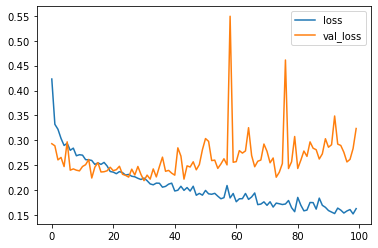

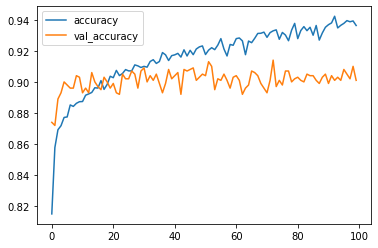

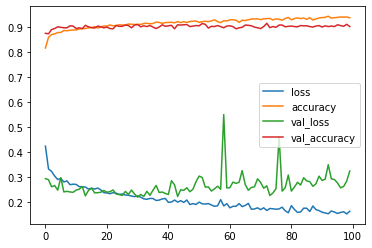

In [141]:
losses = pd.DataFrame(h.history)
losses.head()
losses[['loss','val_loss']].plot() 
losses[['accuracy','val_accuracy']].plot() 
losses.plot()

In [145]:
save_model(model, "TensorFlow Improved")

INFO:tensorflow:Assets written to: TensorFlow Improved\assets


INFO:tensorflow:Assets written to: TensorFlow Improved\assets


In [12]:
new_model = keras.models.load_model(r"C:\Users\yixua\OneDrive - Nanyang Technological University\AY2022-2023 SEM 1\BC3409 AI in Accounting and Finance\Project\TensorFlow Improved")

In [13]:
new_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 149, 149, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 147, 147, 64)      18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 73, 73, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 71, 71, 128)       73856     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 35, 35, 128)     

In [14]:
score = new_model.evaluate(test_generator)
print(score)

63/63 [==============================] - 6s 88ms/step - loss: 0.3237 - accuracy: 0.9010
[0.32374292612075806, 0.9010000228881836]


In [16]:
pred = new_model.predict(test_generator)

63/63 [==============================] - 6s 90ms/step


In [17]:
pred

array([[2.81446815e-01],
       [4.61280458e-02],
       [1.96004421e-01],
       [1.70839671e-03],
       [6.60438964e-04],
       [2.66284615e-01],
       [3.27696085e-01],
       [5.66239476e-01],
       [9.74903882e-01],
       [9.54021525e-04],
       [3.07119364e-04],
       [6.22682683e-02],
       [8.56713578e-03],
       [6.87875375e-02],
       [5.18566871e-04],
       [3.09896432e-02],
       [1.06814662e-02],
       [1.94583058e-01],
       [3.51164229e-02],
       [3.50119022e-04],
       [7.67944905e-04],
       [1.00000000e+00],
       [4.51577544e-05],
       [3.55105527e-04],
       [5.76333283e-03],
       [8.21178794e-01],
       [1.04578081e-04],
       [1.42852992e-01],
       [1.37016764e-02],
       [1.26944542e-06],
       [7.32320501e-03],
       [9.81790014e-04],
       [7.02442275e-03],
       [5.57530086e-07],
       [1.47477409e-03],
       [5.43745607e-02],
       [7.88606033e-02],
       [4.53765169e-02],
       [1.60149589e-01],
       [3.66868973e-02],


In [19]:
pred = np.round(pred).tolist()
pred

[[0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [1.0],
 [1.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [1.0],
 [0.0],
 [0.0],
 [0.0],
 [1.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [1.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [1.0],
 [0.0],
 [0.0],
 [1.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [1.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [1.0],
 [0.0],
 [0.0],
 [1.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [1.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [1.0],
 [1.0],
 [0.0],
 [0.0],
 [0.0],
 [1.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [1.0],
 [1.0],
 [0.0],
 [0.0],


In [21]:
cm = confusion_matrix(test_generator.classes, pred)
cm

array([[459,  41],
       [ 58, 442]], dtype=int64)

In [22]:
tn, fp, fn, tp = cm.ravel()
(tn, fp, fn, tp)

(459, 41, 58, 442)

<AxesSubplot:>

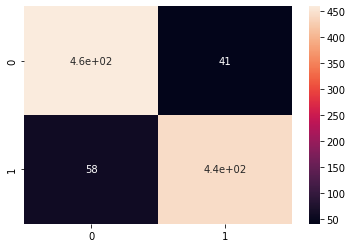

In [23]:
sns.heatmap(cm, annot=True)

In [24]:
acc = (tp+tn)/(tp+tn+fn+fp)
print("Accuracy is: ", acc)

fnr = fn/(tp+fn)
print("False Negative Rate is: ", fnr)

precision = tp/(tp+fp)
print("Precision is : ", precision)

recall = tp/(tp+fn)
print("Recall is : ", recall)

Accuracy is:  0.901
False Negative Rate is:  0.116
Precision is :  0.9151138716356108
Recall is :  0.884


## Final Model - BEST RESULT

## Further Testing 

### Data Augmentation

In [3]:
train_datagen = ImageDataGenerator(
        rescale=1. / 255,
        zoom_range=0.2,
        rotation_range=15,
        horizontal_flip=True)

In [4]:
test_datagen = ImageDataGenerator(
    rescale=1./255)

### Determining optimal image size

In [5]:
# Get the Image Resolutions
imgs = [img.name for img in Path(train_path + "\\benign\\").iterdir() if img.suffix == ".jpg"]
img_meta = {}
for f in imgs: img_meta[str(f)] = imagesize.get(train_path + "\\benign\\"+f)

# Convert it to Dataframe and compute aspect ratio
img_meta_df = pd.DataFrame.from_dict([img_meta]).T.reset_index().set_axis(['FileName', 'Size'], axis='columns', inplace=False)
img_meta_df[["Width", "Height"]] = pd.DataFrame(img_meta_df["Size"].tolist(), index=img_meta_df.index)
img_meta_df["Aspect Ratio"] = round(img_meta_df["Width"] / img_meta_df["Height"], 2)

print("Train Benign Dataset")
print(f'Total Nr of Images in the dataset: {len(img_meta_df)}')
img_meta_df.head()

Train Benign Dataset
Total Nr of Images in the dataset: 5000


,FileName,Size,Width,Height,Aspect Ratio
0,melanoma_0.jpg,"(300, 300)",300,300,1.0
1,melanoma_1.jpg,"(300, 300)",300,300,1.0
2,melanoma_10.jpg,"(300, 300)",300,300,1.0
3,melanoma_100.jpg,"(300, 300)",300,300,1.0
4,melanoma_1000.jpg,"(300, 300)",300,300,1.0


In [6]:
# Get the Image Resolutions
imgs = [img.name for img in Path(train_path + "\\malignant\\").iterdir() if img.suffix == ".jpg"]
img_meta = {}
for f in imgs: img_meta[str(f)] = imagesize.get(train_path + "\\malignant\\"+f)

# Convert it to Dataframe and compute aspect ratio
img_meta_df = pd.DataFrame.from_dict([img_meta]).T.reset_index().set_axis(['FileName', 'Size'], axis='columns', inplace=False)
img_meta_df[["Width", "Height"]] = pd.DataFrame(img_meta_df["Size"].tolist(), index=img_meta_df.index)
img_meta_df["Aspect Ratio"] = round(img_meta_df["Width"] / img_meta_df["Height"], 2)

print("Train Malignant Dataset")
print(f'Total Nr of Images in the dataset: {len(img_meta_df)}')
img_meta_df.head()

Train Malignant Dataset
Total Nr of Images in the dataset: 4605


,FileName,Size,Width,Height,Aspect Ratio
0,melanoma_5000.jpg,"(300, 300)",300,300,1.0
1,melanoma_5001.jpg,"(300, 300)",300,300,1.0
2,melanoma_5002.jpg,"(300, 300)",300,300,1.0
3,melanoma_5003.jpg,"(300, 300)",300,300,1.0
4,melanoma_5004.jpg,"(300, 300)",300,300,1.0


In [7]:
# Get the Image Resolutions
imgs = [img.name for img in Path(test_path + "\\benign\\").iterdir() if img.suffix == ".jpg"]
img_meta = {}
for f in imgs: img_meta[str(f)] = imagesize.get(test_path + "\\benign\\"+f)

# Convert it to Dataframe and compute aspect ratio
img_meta_df = pd.DataFrame.from_dict([img_meta]).T.reset_index().set_axis(['FileName', 'Size'], axis='columns', inplace=False)
img_meta_df[["Width", "Height"]] = pd.DataFrame(img_meta_df["Size"].tolist(), index=img_meta_df.index)
img_meta_df["Aspect Ratio"] = round(img_meta_df["Width"] / img_meta_df["Height"], 2)

print("Test Benign Dataset")
print(f'Total Nr of Images in the dataset: {len(img_meta_df)}')
img_meta_df.head()

Test Benign Dataset
Total Nr of Images in the dataset: 500


,FileName,Size,Width,Height,Aspect Ratio
0,melanoma_10000.jpg,"(300, 300)",300,300,1.0
1,melanoma_10001.jpg,"(300, 300)",300,300,1.0
2,melanoma_10002.jpg,"(300, 300)",300,300,1.0
3,melanoma_10003.jpg,"(300, 300)",300,300,1.0
4,melanoma_10004.jpg,"(300, 300)",300,300,1.0


In [8]:
# Get the Image Resolutions
imgs = [img.name for img in Path(test_path + "\\malignant\\").iterdir() if img.suffix == ".jpg"]
img_meta = {}
for f in imgs: img_meta[str(f)] = imagesize.get(test_path + "\\malignant\\"+f)

# Convert it to Dataframe and compute aspect ratio
img_meta_df = pd.DataFrame.from_dict([img_meta]).T.reset_index().set_axis(['FileName', 'Size'], axis='columns', inplace=False)
img_meta_df[["Width", "Height"]] = pd.DataFrame(img_meta_df["Size"].tolist(), index=img_meta_df.index)
img_meta_df["Aspect Ratio"] = round(img_meta_df["Width"] / img_meta_df["Height"], 2)

print("Test Malignant Dataset")
print(f'Total Nr of Images in the dataset: {len(img_meta_df)}')
img_meta_df.head()

Test Malignant Dataset
Total Nr of Images in the dataset: 500


,FileName,Size,Width,Height,Aspect Ratio
0,melanoma_10105.jpg,"(300, 300)",300,300,1.0
1,melanoma_10106.jpg,"(300, 300)",300,300,1.0
2,melanoma_10107.jpg,"(300, 300)",300,300,1.0
3,melanoma_10108.jpg,"(300, 300)",300,300,1.0
4,melanoma_10109.jpg,"(300, 300)",300,300,1.0


Text(0, 0.5, 'Height')

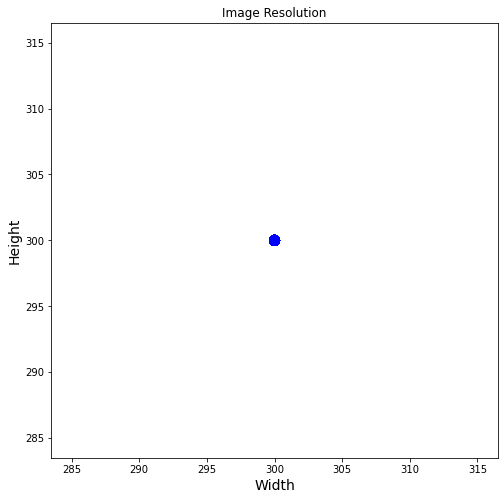

In [9]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
points = ax.scatter(img_meta_df.Width, img_meta_df.Height, color='blue', alpha=0.5, s=img_meta_df["Aspect Ratio"]*100, picker=True)
ax.set_title("Image Resolution")
ax.set_xlabel("Width", size=14)
ax.set_ylabel("Height", size=14)

**Optimal Image Size is 300 by 300 as all images in the dataset are 300 x 300**

In [10]:
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(300, 300),
        batch_size= 16,
        class_mode='binary',
        shuffle=True)

Found 9605 images belonging to 2 classes.


In [11]:
test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(300, 300),
        batch_size=16,
        class_mode='binary',
        shuffle=False)

Found 1000 images belonging to 2 classes.


In [12]:
nb_filter = 32
image_size = (300,300,3)

model = Sequential()
model.add(Conv2D(nb_filter,(3,3), input_shape=image_size, activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2),strides = 2))

model.add(Conv2D(nb_filter*2, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides = 2))

model.add(Conv2D(nb_filter*4, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides = 2))
          
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 128)      0

In [13]:
nb_fc_neurons = 512

model.add(Flatten())
model.add(Dense(nb_fc_neurons))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [14]:
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [15]:
keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [16]:
train_data_size = 9605
batch_size = 16

h = model.fit_generator(
        train_generator,
        steps_per_epoch = train_data_size // batch_size,
        epochs= 100,
        validation_data = test_generator,
    )

C:\Users\yixua\AppData\Local\Temp\ipykernel_14356\1281281485.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  h = model.fit_generator(


Epoch 1/100
600/600 [==============================] - 362s 602ms/step - loss: 0.4629 - accuracy: 0.7941 - val_loss: 0.2937 - val_accuracy: 0.8870
Epoch 2/100
600/600 [==============================] - 351s 584ms/step - loss: 0.3405 - accuracy: 0.8573 - val_loss: 0.3003 - val_accuracy: 0.8930
Epoch 3/100
600/600 [==============================] - 346s 577ms/step - loss: 0.3180 - accuracy: 0.8670 - val_loss: 0.2632 - val_accuracy: 0.8880
Epoch 4/100
600/600 [==============================] - 344s 573ms/step - loss: 0.3205 - accuracy: 0.8657 - val_loss: 0.2648 - val_accuracy: 0.8910
Epoch 5/100
600/600 [==============================] - 344s 572ms/step - loss: 0.3240 - accuracy: 0.8646 - val_loss: 0.2537 - val_accuracy: 0.8880
Epoch 6/100
600/600 [==============================] - 343s 572ms/step - loss: 0.2983 - accuracy: 0.8749 - val_loss: 0.2466 - val_accuracy: 0.8960
Epoch 7/100
600/600 [==============================] - 344s 572ms/step - loss: 0.2899 - accuracy: 0.8786 - val_loss: 0

<AxesSubplot:>

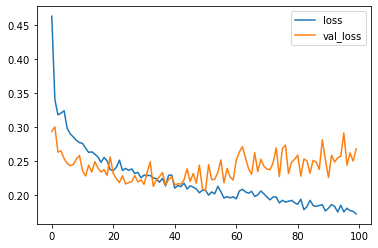

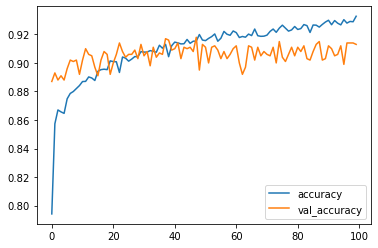

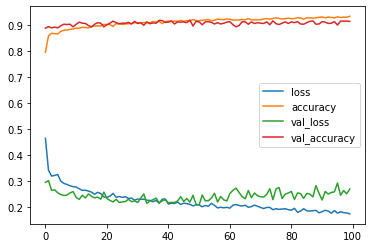

In [18]:
losses = pd.DataFrame(h.history)
losses.head()
losses[['loss','val_loss']].plot() 
losses[['accuracy','val_accuracy']].plot() 
losses.plot()

In [19]:
save_model(model, "TensorFlow Improved V2")

INFO:tensorflow:Assets written to: TensorFlow Improved V2\assets


INFO:tensorflow:Assets written to: TensorFlow Improved V2\assets


In [20]:
new_model = keras.models.load_model(r"C:\Users\yixua\OneDrive - Nanyang Technological University\AY2022-2023 SEM 1\BC3409 AI in Accounting and Finance\Project\TensorFlow Improved V2")

In [21]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 128)      0

In [22]:
score = new_model.evaluate(test_generator)
print(score)

63/63 [==============================] - 7s 101ms/step - loss: 0.2680 - accuracy: 0.9130
[0.2680201530456543, 0.9129999876022339]


In [23]:
pred = new_model.predict(test_generator)

63/63 [==============================] - 6s 101ms/step


In [24]:
pred

array([[1.26470610e-01],
       [6.52513281e-03],
       [1.68360639e-02],
       [2.62452795e-06],
       [6.74818584e-05],
       [9.43267643e-02],
       [2.48250395e-01],
       [7.61717081e-01],
       [6.17686331e-01],
       [1.95828960e-07],
       [4.84785289e-07],
       [2.01663002e-01],
       [7.76179484e-04],
       [1.11976132e-01],
       [1.78761592e-08],
       [3.82138928e-03],
       [4.65235813e-03],
       [5.30740690e-05],
       [3.51923853e-02],
       [1.13117767e-06],
       [2.78321910e-03],
       [9.99999821e-01],
       [1.11467465e-07],
       [1.25374339e-04],
       [5.42664761e-03],
       [6.25261009e-01],
       [4.71645626e-06],
       [4.24753837e-02],
       [1.23029770e-02],
       [1.64390627e-07],
       [1.98984239e-03],
       [1.77697971e-01],
       [6.08104328e-03],
       [6.88025728e-02],
       [2.08319798e-02],
       [1.59194302e-02],
       [9.95729044e-02],
       [7.32726082e-02],
       [3.66076045e-02],
       [4.19300571e-02],


In [25]:
pred = np.round(pred).tolist()
pred

[[0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [1.0],
 [1.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [1.0],
 [0.0],
 [0.0],
 [0.0],
 [1.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [1.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [1.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [1.0],
 [0.0],
 [0.0],
 [1.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [1.0],
 [0.0],
 [0.0],
 [1.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [1.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [1.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [1.0],
 [0.0],
 [0.0],
 [0.0],


In [26]:
cm = confusion_matrix(test_generator.classes, pred)
cm

array([[470,  30],
       [ 57, 443]], dtype=int64)

In [27]:
tn, fp, fn, tp = cm.ravel()
(tn, fp, fn, tp)

(470, 30, 57, 443)

<AxesSubplot:>

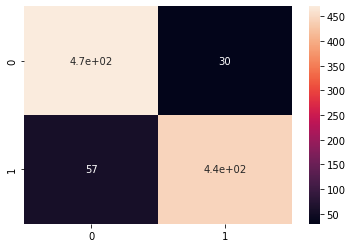

In [28]:
sns.heatmap(cm, annot=True)

In [29]:
acc = (tp+tn)/(tp+tn+fn+fp)
print("Accuracy is: ", acc)

fnr = fn/(tp+fn)
print("False Negative Rate is: ", fnr)

precision = tp/(tp+fp)
print("Precision is : ", precision)

recall = tp/(tp+fn)
print("Recall is : ", recall)

Accuracy is:  0.913
False Negative Rate is:  0.114
Precision is :  0.9365750528541226
Recall is :  0.886
